<a href="https://colab.research.google.com/github/joebracegirdle/Portfolio/blob/main/Pandas_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a practice excercise to use the Pandas dataframe to analyse some chemical data I have produced. The goal was to load the dataset, and manipulate it in a way that allowed me to determine relationships between the class of molecule and the types of atoms present in the examples.

In [8]:
pip install pandas matplotlib seaborn


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
## Imported data as df
df = pd.read_csv("/content/sample_data/Lichen_test_fixed.csv")
df

,Name,Formula,Class
0,(-)-allo-Pertusaric acid,C21H34O5,Didepside
1,(-)-Dihydropertusaric acid,C20H34O5,Paraconic acids
2,(+)-Griseofulvin,C17H17ClO6,Misc
3,"1,8-Dihydroxy-3,6-dimethoxyxanthone",C15H12O6,Xanthone
4,1'-Methyl hypothamnolate,C20H20O10,Didepside
...,...,...,...
529,Virensic acid,C18H14O8,Depsidone
530,Vulpinic acid,C19H14O5,Pulvinic Acid Derivatives
531,α-Acetylconstictic acid,C21H16O11,Depsidone
532,α-Acetylhypoconstictic acid,C21H18O10,Depsidone


In [11]:
duplicated = df[df.duplicated()]
duplicated.shape

(0, 3)

In [12]:
df.groupby(["Class"]).nunique()

,Name,Formula
Class,,
Acid,6,5
Benzyldepside,5,5
Biphenyl,1,1
Bisxanthone,4,2
Chromone,2,2
Cleavage Products of Depsides and Depsidones,6,4
Depsidone,121,78
Dibenzofuran,23,18
Didepside,182,82


In [13]:
df.groupby(["Class"])["Formula"].nunique()

Class
Acid                                             5
Benzyldepside                                    5
Biphenyl                                         1
Bisxanthone                                      2
Chromone                                         2
Cleavage Products of Depsides and Depsidones     4
Depsidone                                       78
Dibenzofuran                                    18
Didepside                                       82
Diphenylether                                   11
Epidithiopiperazine-2,5-dione                    2
Misc                                             8
Naphthopyrone                                    3
Paraconic acids                                  8
Phthalide                                        2
Pulvinic Acid Derivatives                        7
Pyrone                                           6
Quinone                                         19
Terpene                                         14
Terphenyl                

In [14]:
molecules = df.Formula.values.tolist()

import re


In [15]:
#list of molecules is defined

# Initialize a dictionary to store data
data_dict = {'Molecule': molecules}

# Loop through molecules and extract element-count pairs
for idx, m in enumerate(molecules):
    pairs = re.findall(r'([A-Z][a-z]?)(\d*)', m)
    for pair in pairs:
        element = pair[0]
        count = pair[1] if pair[1] else '1'
        data_dict.setdefault(element, [None] * len(molecules))[idx] = int(count)

# Create a DataFrame from the extracted data dictionary
df1 = pd.DataFrame(data_dict)

# Print the resulting DataFrame
print(df1)


       Molecule   C   H   O   Cl   N   S
0      C21H34O5  21  34   5  NaN NaN NaN
1      C20H34O5  20  34   5  NaN NaN NaN
2    C17H17ClO6  17  17   6  1.0 NaN NaN
3      C15H12O6  15  12   6  NaN NaN NaN
4     C20H20O10  20  20  10  NaN NaN NaN
..          ...  ..  ..  ..  ...  ..  ..
529    C18H14O8  18  14   8  NaN NaN NaN
530    C19H14O5  19  14   5  NaN NaN NaN
531   C21H16O11  21  16  11  NaN NaN NaN
532   C21H18O10  21  18  10  NaN NaN NaN
533    C28H32O9  28  32   9  NaN NaN NaN

[534 rows x 7 columns]


In [16]:
merged_df = pd.merge(df, df1, left_index=True, right_index=True)
merged_df

,Name,Formula,Class,Molecule,C,H,O,Cl,N,S
0,(-)-allo-Pertusaric acid,C21H34O5,Didepside,C21H34O5,21,34,5,NaN,NaN,NaN
1,(-)-Dihydropertusaric acid,C20H34O5,Paraconic acids,C20H34O5,20,34,5,NaN,NaN,NaN
2,(+)-Griseofulvin,C17H17ClO6,Misc,C17H17ClO6,17,17,6,1.0,NaN,NaN
3,"1,8-Dihydroxy-3,6-dimethoxyxanthone",C15H12O6,Xanthone,C15H12O6,15,12,6,NaN,NaN,NaN
4,1'-Methyl hypothamnolate,C20H20O10,Didepside,C20H20O10,20,20,10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
529,Virensic acid,C18H14O8,Depsidone,C18H14O8,18,14,8,NaN,NaN,NaN
530,Vulpinic acid,C19H14O5,Pulvinic Acid Derivatives,C19H14O5,19,14,5,NaN,NaN,NaN
531,α-Acetylconstictic acid,C21H16O11,Depsidone,C21H16O11,21,16,11,NaN,NaN,NaN
532,α-Acetylhypoconstictic acid,C21H18O10,Depsidone,C21H18O10,21,18,10,NaN,NaN,NaN


<ipython-input-17-adc84fdf489d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = merged_df.corr()


,C,H,O,Cl,N,S
C,1.000000,0.333540,0.163867,-0.259440,0.627376,NaN
H,0.333540,1.000000,0.069671,-0.380585,0.678528,NaN
O,0.163867,0.069671,1.000000,-0.300898,0.918559,NaN
Cl,-0.259440,-0.380585,-0.300898,1.000000,NaN,NaN
N,0.627376,0.678528,0.918559,NaN,1.000000,NaN
S,NaN,NaN,NaN,NaN,NaN,NaN


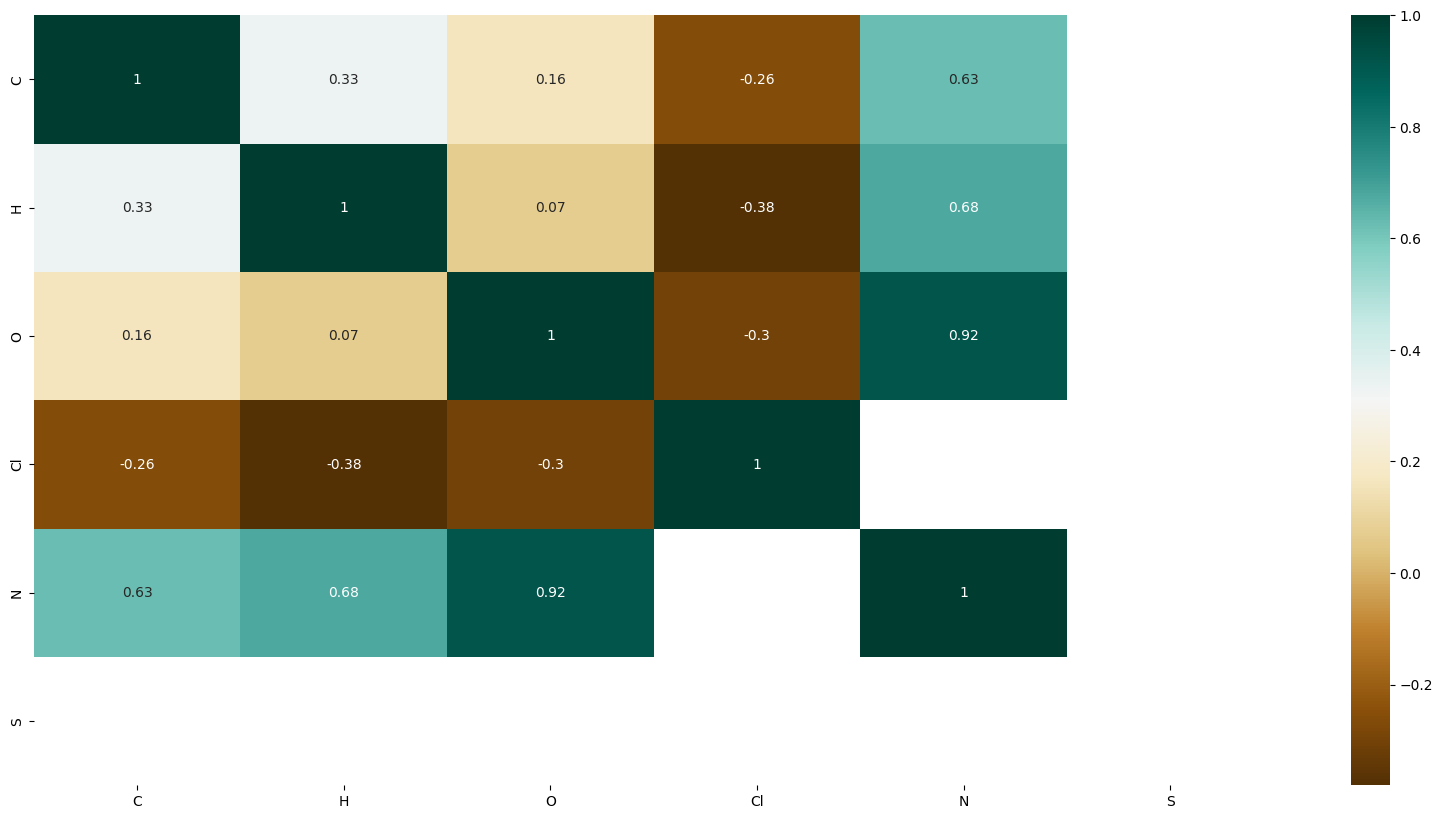

In [17]:
plt.figure(figsize=(20,10))
c = merged_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

In [18]:
merged_df.head()

,Name,Formula,Class,Molecule,C,H,O,Cl,N,S
0,(-)-allo-Pertusaric acid,C21H34O5,Didepside,C21H34O5,21,34,5,NaN,NaN,NaN
1,(-)-Dihydropertusaric acid,C20H34O5,Paraconic acids,C20H34O5,20,34,5,NaN,NaN,NaN
2,(+)-Griseofulvin,C17H17ClO6,Misc,C17H17ClO6,17,17,6,1.0,NaN,NaN
3,"1,8-Dihydroxy-3,6-dimethoxyxanthone",C15H12O6,Xanthone,C15H12O6,15,12,6,NaN,NaN,NaN
4,1'-Methyl hypothamnolate,C20H20O10,Didepside,C20H20O10,20,20,10,NaN,NaN,NaN


In [19]:
# Group by the 'Class' column and calculate the sum of each numerical column
grouped = merged_df.groupby('Class')['C', 'H', 'O', 'Cl', 'N', 'S'].mean()

# Reset the index to move 'Class' from the index to a regular column
totals_df = grouped.reset_index()

# Rename the columns to match your desired column names
totals_df.columns = ['Class', 'Mean_C', 'Mean_H', 'Mean_O', 'Mean_Cl', 'Mean_N', 'Mean_S']

totals_df

<ipython-input-19-3566e3d29207>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = merged_df.groupby('Class')['C', 'H', 'O', 'Cl', 'N', 'S'].mean()


,Class,Mean_C,Mean_H,Mean_O,Mean_Cl,Mean_N,Mean_S
0,Acid,20.333333,37.333333,5.666667,NaN,NaN,NaN
1,Benzyldepside,18.200000,16.800000,8.400000,NaN,NaN,NaN
2,Biphenyl,22.000000,26.000000,8.000000,NaN,NaN,NaN
3,Bisxanthone,32.000000,30.500000,14.250000,NaN,NaN,NaN
4,Chromone,14.500000,13.500000,6.000000,1.000000,NaN,NaN
5,Cleavage Products of Depsides and Depsidones,10.333333,12.333333,4.166667,NaN,NaN,NaN
6,Depsidone,22.421488,17.719008,7.892562,1.846154,NaN,NaN
7,Dibenzofuran,19.304348,19.478261,6.086957,NaN,NaN,NaN
8,Didepside,22.714286,26.703297,7.505495,1.181818,NaN,NaN
9,Diphenylether,23.181818,27.363636,7.363636,3.500000,NaN,NaN


In [20]:
# convert to long (tidy) form
dfm = totals_df.melt('Class', var_name='cols', value_name='vals')
dfm

,Class,cols,vals
0,Acid,Mean_C,20.333333
1,Benzyldepside,Mean_C,18.200000
2,Biphenyl,Mean_C,22.000000
3,Bisxanthone,Mean_C,32.000000
4,Chromone,Mean_C,14.500000
...,...,...,...
133,Terpene,Mean_S,NaN
134,Terphenyl,Mean_S,NaN
135,Tetradepside,Mean_S,NaN
136,Tridepside,Mean_S,NaN


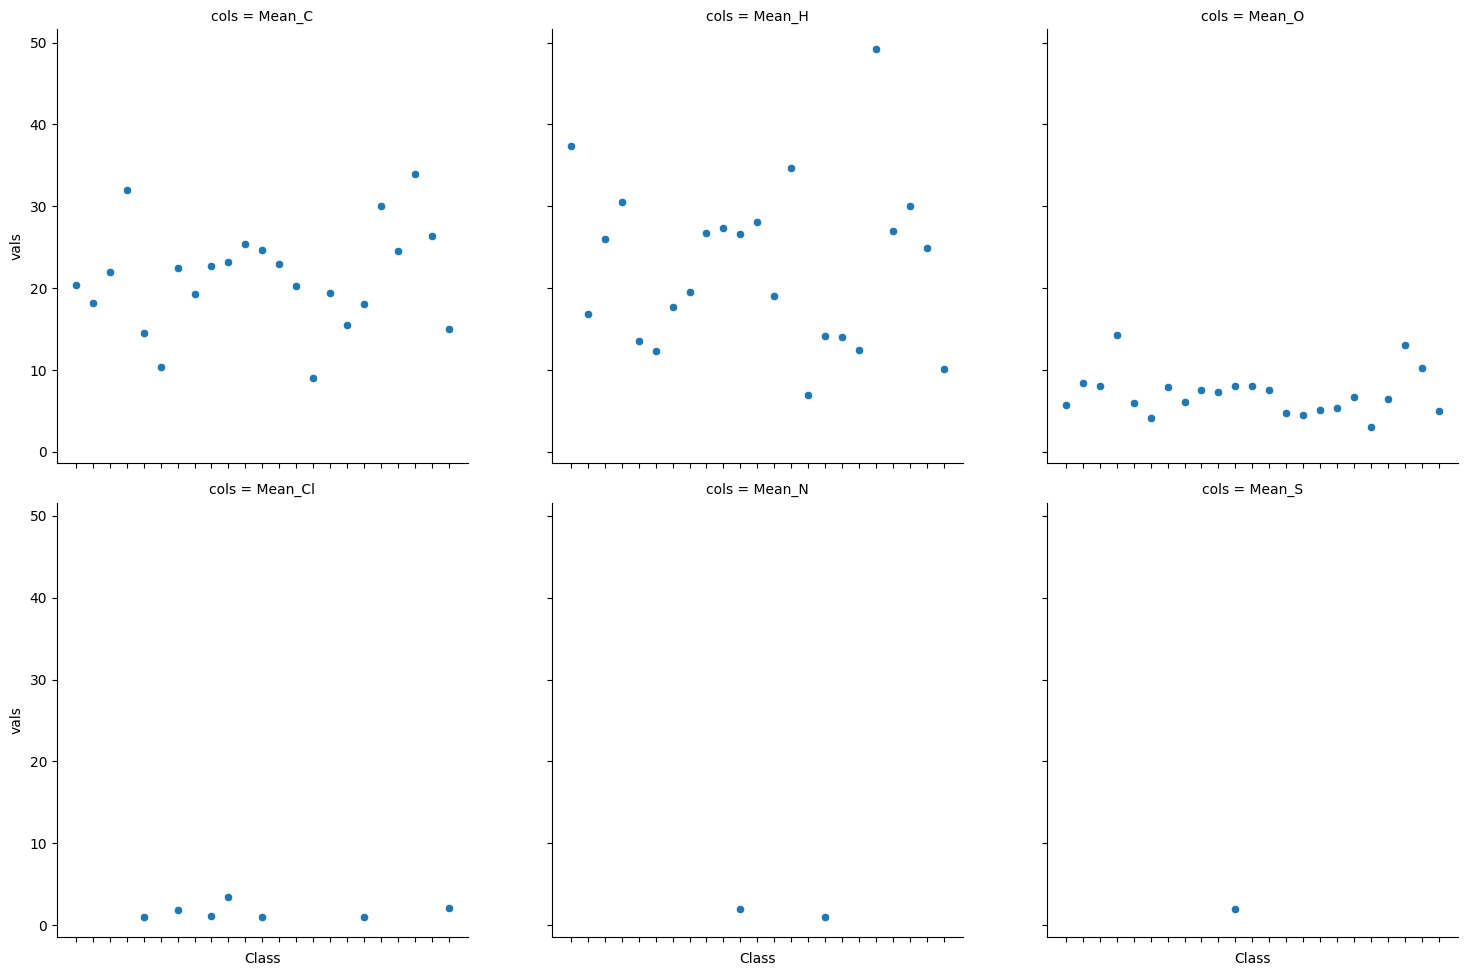

In [21]:
plot = sns.relplot(
    data=dfm,
    x="Class", y="vals", col="cols", col_wrap=3
)
plot.set_xticklabels(rotation=90)



In [22]:
max_index = dfm['vals'].idxmax()

dfm.loc[max_index]

Class    Terpene
cols      Mean_H
vals        49.2
Name: 41, dtype: object

Throughout this project in V1, an outlier of 80 H atoms for dibenzofurans was produced, being far too large for the molecules in this data set. I went back to the dataset and realised an 'O' was replaced by a '0'. This scewed the data immensely, so it has been edited and the analysis repeated as V2, producing better results. Clean data is essential to produce an accurate analysis.